In [1]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from model_suport import load_best_score, plot_confusion_matrix_with_labels, generate_predictions_csv
import optuna
import os
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Cell 2: Carregamento dos dados
data = pd.read_csv('../Data/5. Data APOS 1_2 sem desvio padrao.csv') 
data_test = pd.read_csv('../Data/5. Data TEST APOS 1_2 sem desviopadra.csv')

# Separação das features e do target
X = data.drop('Transition', axis=1)
y = data['Transition']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)

# Obtenção do melhor score anterior
best_score, _ = load_best_score()

Current Best Score Stored: 45.42528735632183867210%
Model with Best Score: RandomForestClassifier



TPE 

In [2]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 900, 1100)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [False, True])

    model1 = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=34,
        bootstrap=bootstrap
    )

    scores_5 = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
    scores_10 = cross_val_score(model1, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_5 = scores_5.mean()
    accuracy_10 = scores_10.mean()

    return max(accuracy_5, accuracy_10)


In [3]:
#study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
#study.optimize(objective, n_trials=200)
#print(f"Melhor acurácia: {study.best_value}")
#print(f"Melhores hiperparâmetros: {study.best_params}")


Resultados

In [4]:

# *? ###################################################################################################################################################################
# *?     ACCURACY    ##          DataSet        ##      Parametros
# *? ###################################################################################################################################################################
# *?  0.5157575      ##   5 data apos 1_2 sem des ##  {'n_estimators': 997, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': False}
# *?  0.520101010    ##   5 data apos 1_2 sem des ## {'n_estimators': 994, 'max_features': 'log2', 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}
# *? 0.51565656565   ## 5 data apos 1_2 sem des    ## {'n_estimators': 946, 'max_features': 'log2', 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 2, 'bootstrap': False}

Random Forest 

In [5]:
# Cell 5: Treinamento com os melhores parâmetros encontrados
ExtraTrees_model = ExtraTreesClassifier(
    n_estimators=994, max_features='log2', max_depth=16,
    min_samples_split=3, min_samples_leaf=2, bootstrap=False, random_state=34
)
ExtraTrees_model.fit(X_train, y_train)

random_forest_cross_val_score = cross_val_score(ExtraTrees_model, X_train, y_train, cv=10)
random_forest_cross_val_score_scoring = cross_val_score(ExtraTrees_model, X_train, y_train, cv=5, scoring='f1_macro')
random_forest_cross_balance_score_scoring = cross_val_score(ExtraTrees_model, X_train, y_train, cv=5, scoring='balanced_accuracy')


print(f"Accuracy score: {random_forest_cross_val_score.mean()}")
print(f"Standard deviation: {random_forest_cross_val_score.std()}")
print(f"F1 Macro score: {random_forest_cross_val_score_scoring.mean()}")
print(f"F1 Macro score deviation: {random_forest_cross_val_score_scoring.std()}")
print(f"Balance Accuracy score: {random_forest_cross_balance_score_scoring.mean()}")
print(f"Balance Accuracy score deviation: {random_forest_cross_balance_score_scoring.std()}")


Accuracy score: 0.4571146245059288
Standard deviation: 0.07490640006045354
F1 Macro score: 0.4326359128487612
F1 Macro score deviation: 0.05401529011183268
Balance Accuracy score: 0.4625541125541125
Balance Accuracy score deviation: 0.056692380027684855


Matrix Confusao 

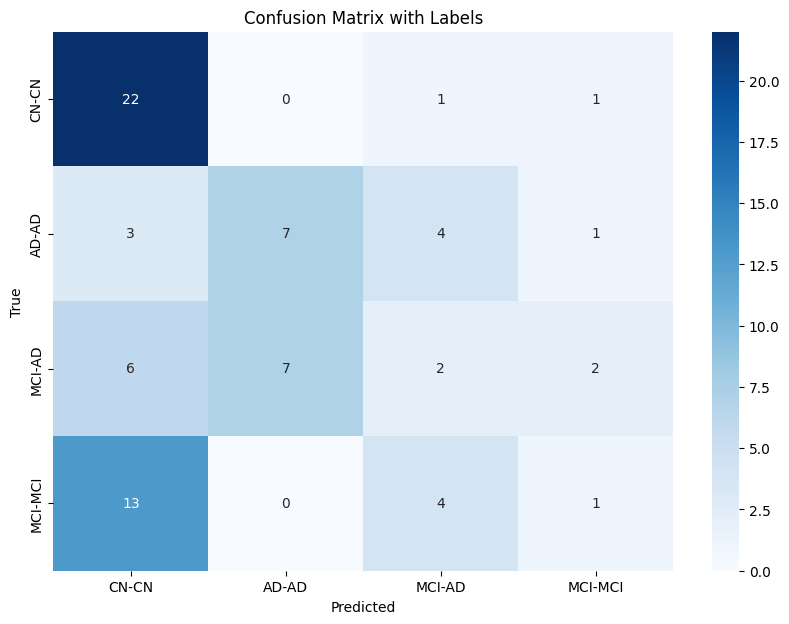

In [6]:


label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3
}

# Predição e plot da matriz de confusão
# Predição e plot da matriz de confusão
y_pred = ExtraTrees_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix_with_labels(cm)


In [7]:



generate_predictions_csv(ExtraTrees_model,     data_test          )# If the new best score is higher, update the file






Contagem de previsões para cada label:
Result
CN-CN      55
AD-AD      18
MCI-AD     16
MCI-MCI    11
Name: count, dtype: int64
Resultados salvos no arquivo ExtraTreesClassifier.csv
